In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
# mortality_data = pd.read_csv("C:/NEU/CPS Q4/Second Half/ALY6150 Healthcare_Pharma Data and Applications/1999 to 2016 mortality rate.csv", low_memory = False)
mortality_data = pd.read_csv(r"1999 to 2016 mortality rate.csv", low_memory = False)

In [3]:
mortality_data["State"].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Nebraska', 'Nevada', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Alaska', 'Montana', 'New Hampshire',
       'North Dakota', 'Vermont', 'Wyoming'], dtype=object)

In [4]:
reshaped_df = pd.read_csv("CO_emissions_pollution.csv")
reshaped_df.rename(columns={"Emissions": "Emissions_CO"}, inplace=True)
reshaped_df1 = pd.read_csv("PM10_emissions_pollution.csv")
reshaped_df1.rename(columns={"Emissions": "Emissions_PM10"}, inplace=True)

In [5]:
reshaped_df.columns

Index(['State', 'Year', 'Emissions_CO'], dtype='object')

In [6]:
t = mortality_data.merge(reshaped_df, on=['State', 'Year'])

In [7]:
t

,ICD Chapter,ICD Chapter Code,Year,Year Code,State,State Code,2013 Urbanization,2013 Urbanization Code,Gender,Age Group,Age Group Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,Emissions_CO
0,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Central Metro,1,Female,65-74 years,65-74,20,27625,72.4,44.2,111.8,16.2,3011.541333
1,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Central Metro,1,Female,75-84 years,75-84,22,20323,108.3,67.8,163.9,23.1,3011.541333
2,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Central Metro,1,Female,85+ years,85+,30,8514,352.4,237.7,503,64.3,3011.541333
3,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Fringe Metro,2,Female,75-84 years,75-84,12,8702,137.9 (Unreliable),71.3,240.9,39.8,3011.541333
4,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Fringe Metro,2,Female,85+ years,85+,10,3190,313.5 (Unreliable),150.3,576.5,99.1,3011.541333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419351,External causes of morbidity and mortality,V01-Y89,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,25-34 years,25-34,18,9696,185.6 (Unreliable),110,293.4,43.8,164.499445
419352,External causes of morbidity and mortality,V01-Y89,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,35-44 years,35-44,14,9664,144.9 (Unreliable),79.2,243.1,38.7,164.499445
419353,External causes of morbidity and mortality,V01-Y89,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,45-54 years,45-54,18,10047,179.2 (Unreliable),106.2,283.1,42.2,164.499445
419354,External causes of morbidity and mortality,V01-Y89,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,55-64 years,55-64,12,12487,96.1 (Unreliable),49.7,167.9,27.7,164.499445


In [8]:
merged_df = mortality_data.merge(reshaped_df, on=['State', 'Year'], how='outer', indicator=True)

In [9]:
merged_df["_merge"].value_counts()

both          419356
right_only       153
left_only          0
Name: _merge, dtype: int64

In [10]:
merged_df[merged_df["_merge"] == "right_only"]["Year"].value_counts()

1996    51
1997    51
1998    51
Name: Year, dtype: int64

In [11]:
merged_df = mortality_data.merge(reshaped_df, on=['State', 'Year'])
merged_df = merged_df.merge(reshaped_df1, on=['State', 'Year'])
merged_df

,ICD Chapter,ICD Chapter Code,Year,Year Code,State,State Code,2013 Urbanization,2013 Urbanization Code,Gender,Age Group,Age Group Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,Emissions_CO,Emissions_PM10
0,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Central Metro,1,Female,65-74 years,65-74,20,27625,72.4,44.2,111.8,16.2,3011.541333,571.955762
1,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Central Metro,1,Female,75-84 years,75-84,22,20323,108.3,67.8,163.9,23.1,3011.541333,571.955762
2,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Central Metro,1,Female,85+ years,85+,30,8514,352.4,237.7,503,64.3,3011.541333,571.955762
3,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Fringe Metro,2,Female,75-84 years,75-84,12,8702,137.9 (Unreliable),71.3,240.9,39.8,3011.541333,571.955762
4,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Fringe Metro,2,Female,85+ years,85+,10,3190,313.5 (Unreliable),150.3,576.5,99.1,3011.541333,571.955762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419351,External causes of morbidity and mortality,V01-Y89,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,25-34 years,25-34,18,9696,185.6 (Unreliable),110,293.4,43.8,164.499445,426.780451
419352,External causes of morbidity and mortality,V01-Y89,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,35-44 years,35-44,14,9664,144.9 (Unreliable),79.2,243.1,38.7,164.499445,426.780451
419353,External causes of morbidity and mortality,V01-Y89,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,45-54 years,45-54,18,10047,179.2 (Unreliable),106.2,283.1,42.2,164.499445,426.780451
419354,External causes of morbidity and mortality,V01-Y89,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,55-64 years,55-64,12,12487,96.1 (Unreliable),49.7,167.9,27.7,164.499445,426.780451


In [12]:
merged_df.describe()

,Year,Year Code,State Code,2013 Urbanization Code,Deaths,Emissions_CO,Emissions_PM10
count,419356.000000,419356.000000,419356.000000,419356.000000,419356.000000,419356.000000,419356.000000
mean,2007.672848,2007.672848,28.902992,3.350616,102.950686,1797.750906,370.553969
std,5.176686,5.176686,15.513845,1.664555,277.150864,1434.204577,333.494444
min,1999.000000,1999.000000,1.000000,1.000000,10.000000,29.790738,3.463379
25%,2003.000000,2003.000000,17.000000,2.000000,18.000000,851.749315,197.289258
50%,2008.000000,2008.000000,28.000000,3.000000,35.000000,1427.234065,267.725136
75%,2012.000000,2012.000000,42.000000,5.000000,89.000000,2281.444892,424.830988
max,2016.000000,2016.000000,56.000000,6.000000,15627.000000,9618.345877,2697.854607


In [13]:
merged_df.isnull().sum()
merged_df.dropna()

,ICD Chapter,ICD Chapter Code,Year,Year Code,State,State Code,2013 Urbanization,2013 Urbanization Code,Gender,Age Group,Age Group Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,Emissions_CO,Emissions_PM10
0,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Central Metro,1,Female,65-74 years,65-74,20,27625,72.4,44.2,111.8,16.2,3011.541333,571.955762
1,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Central Metro,1,Female,75-84 years,75-84,22,20323,108.3,67.8,163.9,23.1,3011.541333,571.955762
2,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Central Metro,1,Female,85+ years,85+,30,8514,352.4,237.7,503,64.3,3011.541333,571.955762
3,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Fringe Metro,2,Female,75-84 years,75-84,12,8702,137.9 (Unreliable),71.3,240.9,39.8,3011.541333,571.955762
4,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Fringe Metro,2,Female,85+ years,85+,10,3190,313.5 (Unreliable),150.3,576.5,99.1,3011.541333,571.955762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419351,External causes of morbidity and mortality,V01-Y89,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,25-34 years,25-34,18,9696,185.6 (Unreliable),110,293.4,43.8,164.499445,426.780451
419352,External causes of morbidity and mortality,V01-Y89,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,35-44 years,35-44,14,9664,144.9 (Unreliable),79.2,243.1,38.7,164.499445,426.780451
419353,External causes of morbidity and mortality,V01-Y89,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,45-54 years,45-54,18,10047,179.2 (Unreliable),106.2,283.1,42.2,164.499445,426.780451
419354,External causes of morbidity and mortality,V01-Y89,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,55-64 years,55-64,12,12487,96.1 (Unreliable),49.7,167.9,27.7,164.499445,426.780451


# For Circulatory Diseases

In [14]:
df_circulatory = merged_df[merged_df['ICD Chapter'] == 'Diseases of the circulatory system'].copy()
df_circulatory

,ICD Chapter,ICD Chapter Code,Year,Year Code,State,State Code,2013 Urbanization,2013 Urbanization Code,Gender,Age Group,Age Group Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,Emissions_CO,Emissions_PM10
110,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,35-44 years,35-44,24,55067,43.6,27.9,64.8,8.9,3011.541333,571.955762
111,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,45-54 years,45-54,48,46845,102.5,75.5,135.9,14.8,3011.541333,571.955762
112,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,55-64 years,55-64,92,30492,301.7,243.2,370,31.5,3011.541333,571.955762
113,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,65-74 years,65-74,209,27625,756.6,654,859.1,52.3,3011.541333,571.955762
114,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,75-84 years,75-84,460,20323,2263.4,2056.6,2470.3,105.5,3011.541333,571.955762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419317,Diseases of the circulatory system,I00-I99,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,45-54 years,45-54,15,10047,149.3 (Unreliable),83.6,246.2,38.5,164.499445,426.780451
419318,Diseases of the circulatory system,I00-I99,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,55-64 years,55-64,43,12487,344.4,249.2,463.8,52.5,164.499445,426.780451
419319,Diseases of the circulatory system,I00-I99,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,65-74 years,65-74,59,9247,638,485.7,823,83.1,164.499445,426.780451
419320,Diseases of the circulatory system,I00-I99,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,75-84 years,75-84,64,4236,1510.9,1163.5,1929.3,188.9,164.499445,426.780451


## Cleaning Crude Rate

In [15]:
def extract_numerical_value(df, column_name):
    df[column_name] = df[column_name].str.extract(r'(\d+\.\d+|\d+)')
    return df

In [16]:
extract_numerical_value(df_circulatory, 'Crude Rate')


# Converting the data type of column "Crude Rate" from object to float64

df_circulatory["Crude Rate"] = df_circulatory['Crude Rate'].astype(float)

# Checking if it all worked out

df_circulatory.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52102 entries, 110 to 419321
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ICD Chapter                               52102 non-null  object 
 1   ICD Chapter Code                          52102 non-null  object 
 2   Year                                      52102 non-null  int64  
 3   Year Code                                 52102 non-null  int64  
 4   State                                     52102 non-null  object 
 5   State Code                                52102 non-null  int64  
 6   2013 Urbanization                         52102 non-null  object 
 7   2013 Urbanization Code                    52102 non-null  int64  
 8   Gender                                    52102 non-null  object 
 9   Age Group                                 52102 non-null  object 
 10  Age Group Code                 

## Cleaning Crude Rate upper and lower CI

In [17]:
# Finding all the column names where there are any character except Float values - characters_except_float(df)

def characters_except_float(df):
    """
    Find columns in a DataFrame that have special characters (including alphabets) but exclude float values in any row.

    Parameters:
        df (pandas.DataFrame): The DataFrame to search for columns.

    Returns:
        list: A list of column names that have special characters (excluding floats) in any row.

    Example:
        # Create a sample DataFrame
        data = {'Column1': ['ABC', '123', '123.456'],
                'Column2': ['XYZ', '456', '789'],
                'Column3': ['PQR', '789', '()']}
        df = pd.DataFrame(data)

        # Find columns with special characters except floats and alphabets
        special_columns = characters_except_float(df)

        print(special_columns)
        # Output: ['Column3']
    """

    special_char_columns = []

    for column in df.columns:
        is_float = df[column].apply(lambda x: isinstance(x, float))
        special_chars = df[column].apply(lambda x: re.findall(r'[^\d.\s]', str(x)))
        if any(special_chars.str.len() > 0) and not all(is_float):
            special_char_columns.append(column)

    return special_char_columns

In [18]:
characters_except_float(df_circulatory)

['ICD Chapter',
 'ICD Chapter Code',
 'State',
 '2013 Urbanization',
 'Gender',
 'Age Group',
 'Age Group Code',
 'Population',
 'Crude Rate Lower 95% Confidence Interval',
 'Crude Rate Upper 95% Confidence Interval',
 'Crude Rate Standard Error']

In [19]:
def remove_special_characters_and_alphabets(df, columns):
    """
    Remove special characters and alphabets from specified columns in a DataFrame.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing the columns to be modified.
        columns (list): A list of column names to remove special characters and alphabets from.

    Returns:
        pandas.DataFrame: The modified DataFrame with special characters and alphabets removed from the specified columns.
    """
    for column in columns:
        df[column] = df[column].astype(str).str.replace(r'[^0-9.]', '', regex=True)
    return df

The above step is performed upon - 

1. 'Population', 
2. 'Crude Rate', 
3. 'Crude Rate Lower 95% Confidence Interval', 
4. 'Crude Rate Upper 95% Confidence Interval', 
5. 'Crude Rate Standard Error' 

We did this because right now we want to preserve numerical values

In [20]:
remove_special_characters_and_alphabets(df_circulatory, ['Population', 
                                             'Crude Rate', 
                                             'Crude Rate Lower 95% Confidence Interval', 
                                             'Crude Rate Upper 95% Confidence Interval', 
                                             'Crude Rate Standard Error'])
df_circulatory.dropna()

,ICD Chapter,ICD Chapter Code,Year,Year Code,State,State Code,2013 Urbanization,2013 Urbanization Code,Gender,Age Group,Age Group Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,Emissions_CO,Emissions_PM10
110,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,35-44 years,35-44,24,55067,43.6,27.9,64.8,8.9,3011.541333,571.955762
111,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,45-54 years,45-54,48,46845,102.5,75.5,135.9,14.8,3011.541333,571.955762
112,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,55-64 years,55-64,92,30492,301.7,243.2,370,31.5,3011.541333,571.955762
113,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,65-74 years,65-74,209,27625,756.6,654,859.1,52.3,3011.541333,571.955762
114,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,75-84 years,75-84,460,20323,2263.4,2056.6,2470.3,105.5,3011.541333,571.955762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419317,Diseases of the circulatory system,I00-I99,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,45-54 years,45-54,15,10047,149.3,83.6,246.2,38.5,164.499445,426.780451
419318,Diseases of the circulatory system,I00-I99,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,55-64 years,55-64,43,12487,344.4,249.2,463.8,52.5,164.499445,426.780451
419319,Diseases of the circulatory system,I00-I99,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,65-74 years,65-74,59,9247,638.0,485.7,823,83.1,164.499445,426.780451
419320,Diseases of the circulatory system,I00-I99,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,75-84 years,75-84,64,4236,1510.9,1163.5,1929.3,188.9,164.499445,426.780451


In [21]:
df_circulatory.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52102 entries, 110 to 419321
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ICD Chapter                               52102 non-null  object 
 1   ICD Chapter Code                          52102 non-null  object 
 2   Year                                      52102 non-null  int64  
 3   Year Code                                 52102 non-null  int64  
 4   State                                     52102 non-null  object 
 5   State Code                                52102 non-null  int64  
 6   2013 Urbanization                         52102 non-null  object 
 7   2013 Urbanization Code                    52102 non-null  int64  
 8   Gender                                    52102 non-null  object 
 9   Age Group                                 52102 non-null  object 
 10  Age Group Code                 

In [22]:
def object_to_float(df, columns):
    for column in columns:
        df[column] = df[column].astype(float)
    return df

In [23]:
def find_Number_of_rows_with_nothing(df, columns):
    empty_dict = {}
    for column in columns:
        empty_rows = df[df[column] == '']
        empty_rows_count = len(empty_rows)
        empty_dict[column] = empty_rows_count
    return empty_dict

In [24]:
columns_list = ['Crude Rate', 'Population', 'Crude Rate Lower 95% Confidence Interval', 'Crude Rate Upper 95% Confidence Interval', 'Crude Rate Standard Error']
find_Number_of_rows_with_nothing(df_circulatory, columns_list)

{'Crude Rate': 1,
 'Population': 1,
 'Crude Rate Lower 95% Confidence Interval': 1,
 'Crude Rate Upper 95% Confidence Interval': 1,
 'Crude Rate Standard Error': 1}

In [25]:
def remove_empty_with_null(df, columns):
    for column in columns:
        df[column] = df[column].replace('', np.nan)
    return df

remove_empty_with_null(df_circulatory, columns_list)

,ICD Chapter,ICD Chapter Code,Year,Year Code,State,State Code,2013 Urbanization,2013 Urbanization Code,Gender,Age Group,Age Group Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,Emissions_CO,Emissions_PM10
110,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,35-44 years,35-44,24,55067,43.6,27.9,64.8,8.9,3011.541333,571.955762
111,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,45-54 years,45-54,48,46845,102.5,75.5,135.9,14.8,3011.541333,571.955762
112,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,55-64 years,55-64,92,30492,301.7,243.2,370,31.5,3011.541333,571.955762
113,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,65-74 years,65-74,209,27625,756.6,654,859.1,52.3,3011.541333,571.955762
114,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,75-84 years,75-84,460,20323,2263.4,2056.6,2470.3,105.5,3011.541333,571.955762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419317,Diseases of the circulatory system,I00-I99,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,45-54 years,45-54,15,10047,149.3,83.6,246.2,38.5,164.499445,426.780451
419318,Diseases of the circulatory system,I00-I99,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,55-64 years,55-64,43,12487,344.4,249.2,463.8,52.5,164.499445,426.780451
419319,Diseases of the circulatory system,I00-I99,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,65-74 years,65-74,59,9247,638.0,485.7,823,83.1,164.499445,426.780451
419320,Diseases of the circulatory system,I00-I99,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,75-84 years,75-84,64,4236,1510.9,1163.5,1929.3,188.9,164.499445,426.780451


In [26]:
df_circulatory["Crude Rate Lower 95% Confidence Interval"] = df_circulatory['Crude Rate Lower 95% Confidence Interval'].astype(float)
df_circulatory["Crude Rate Upper 95% Confidence Interval"] = df_circulatory['Crude Rate Upper 95% Confidence Interval'].astype(float)
df_circulatory["Crude Rate Standard Error"] = df_circulatory['Crude Rate Standard Error'].astype(float)
df_circulatory["Crude Rate"] = df_circulatory['Crude Rate'].astype(float)

In [27]:
def print_null_percentage(df):
    for col in df.columns:
        null_count = df[col].isnull().sum()
        null_percentage = (null_count / len(df)) * 100
        print(f"Percentage of null values in {col}: {null_percentage}%")

def plot_null_graph(df):
    sns.heatmap(df.isnull(), cbar=False)
    plt.show()

In [28]:
print_null_percentage(df_circulatory)

Percentage of null values in ICD Chapter: 0.0%
Percentage of null values in ICD Chapter Code: 0.0%
Percentage of null values in Year: 0.0%
Percentage of null values in Year Code: 0.0%
Percentage of null values in State: 0.0%
Percentage of null values in State Code: 0.0%
Percentage of null values in 2013 Urbanization: 0.0%
Percentage of null values in 2013 Urbanization Code: 0.0%
Percentage of null values in Gender: 0.0%
Percentage of null values in Age Group: 0.0%
Percentage of null values in Age Group Code: 0.0%
Percentage of null values in Deaths: 0.0%
Percentage of null values in Population: 0.0019193121185367165%
Percentage of null values in Crude Rate: 0.0019193121185367165%
Percentage of null values in Crude Rate Lower 95% Confidence Interval: 0.0019193121185367165%
Percentage of null values in Crude Rate Upper 95% Confidence Interval: 0.0019193121185367165%
Percentage of null values in Crude Rate Standard Error: 0.0019193121185367165%
Percentage of null values in Emissions_CO: 0

In [29]:
df_circulatory = df_circulatory.dropna(subset=['Population', 
                       'Crude Rate', 
                       'Crude Rate Lower 95% Confidence Interval', 
                       'Crude Rate Upper 95% Confidence Interval', 
                       'Crude Rate Standard Error']).copy()

df_circulatory['Population'] = df_circulatory['Population'].astype('int64')

In [30]:
df_circulatory.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52101 entries, 110 to 419321
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ICD Chapter                               52101 non-null  object 
 1   ICD Chapter Code                          52101 non-null  object 
 2   Year                                      52101 non-null  int64  
 3   Year Code                                 52101 non-null  int64  
 4   State                                     52101 non-null  object 
 5   State Code                                52101 non-null  int64  
 6   2013 Urbanization                         52101 non-null  object 
 7   2013 Urbanization Code                    52101 non-null  int64  
 8   Gender                                    52101 non-null  object 
 9   Age Group                                 52101 non-null  object 
 10  Age Group Code                 

## Cleaning Age Data

In [31]:
age_mapping = {'65-74 years': 70, 
               '75-84 years': 80, 
               '85+ years': 90, 
               '35-44 years': 40,
               '55-64 years': 60, 
               '45-54 years': 50, 
               '< 1 year': 0.5, 
               '25-34 years': 30,
               '20-24 years': 22, 
               '1-4 years': 2, 
               '5-9 years': 7, 
               '10-14 years': 12,
               '15-19 years': 17}

df_circulatory['Age Group'] = df_circulatory['Age Group'].map(age_mapping)

In [32]:
df_circulatory['Year'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [33]:
df_circulatory.dropna(inplace = True)

## Cleaning Emission columns

In [34]:
df_circulatory.dropna(inplace = True)

In [35]:
df_circulatory.head()

,ICD Chapter,ICD Chapter Code,Year,Year Code,State,State Code,2013 Urbanization,2013 Urbanization Code,Gender,Age Group,Age Group Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,Emissions_CO,Emissions_PM10
110,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,40.0,35-44,24,55067,43.6,27.9,64.8,8.9,3011.541333,571.955762
111,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,50.0,45-54,48,46845,102.5,75.5,135.9,14.8,3011.541333,571.955762
112,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,60.0,55-64,92,30492,301.7,243.2,370.0,31.5,3011.541333,571.955762
113,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,70.0,65-74,209,27625,756.6,654.0,859.1,52.3,3011.541333,571.955762
114,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,80.0,75-84,460,20323,2263.4,2056.6,2470.3,105.5,3011.541333,571.955762


# EDA

## Visualizations
1. Emmission1 vs Death
2. Death vs age-group(avg. age)
3. Deaths vs state
4. Deaths vs Gender
5. Deaths vs Year
6. Death vs Urbanization
7. Emmission1 vs Death

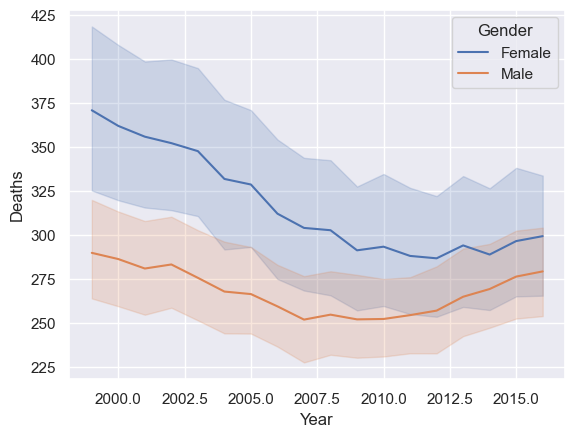

In [36]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="Year", y="Deaths",
             hue="Gender",
             data=df_circulatory)
plt.show()

In [37]:
statistics_by_year = df_circulatory.groupby('Year').agg({
    'Deaths': ['mean', 'median', 'std', 'min', 'max'],
    'Emissions_CO': ['mean', 'median', 'std', 'min', 'max'],
    'Emissions_PM10': ['mean', 'median', 'std', 'min', 'max']
})

statistics_by_year


Deaths                               Emissions_CO               \
            mean median         std min    max         mean       median   
Year                                                                       
1999  328.109537  123.0  707.795037  10  15627  2724.071176  2181.575711   
2000  322.238390  121.0  691.384721  10  15101  2715.309312  2232.232237   
2001  316.565053  119.0  686.410454  10  15076  2574.971719  2151.200553   
2002  316.099105  120.0  678.940943  10  14806  2163.979582  1730.278237   
2003  309.555060  120.0  669.243934  10  14992  2050.387544  1631.967170   
2004  298.102147  117.0  640.652297  10  14209  1898.934635  1505.945856   
2005  295.779889  117.0  633.071241  10  14121  1793.704813  1409.404928   
2006  284.306842  115.0  610.611506  10  13926  1651.754323  1349.427224   
2007  276.354031  111.0  589.484148  10  13437  1517.593895  1269.494644   
2008  277.340580  114.0  586.185622  10  13183  1388.984742  1148.070985   
2009  270.490638  112.0  566.869257  10  12962  1304.346692  1100.031788   
2010  271.471100  114.0  568.203951  10  13191  1217.787383   968.104324   
2011  270.304755  113.0  570.491938  10  13689  1155.525578   930.367413   
2012  271.006231  113.0  572.045108  10  13748  1108.111980   928.463559   
2013  278.502274  119.0  581.492736  10  13791  1088.175710   918.408265   
2014  278.490985  120.0  574.476664  10  13328  1058.791128   851.536368   
2015  285.860873  119.0  602.074382  10  14245  1010.506299   863.239862   
2016  288.651709  124.0  603.324009  10  14071   904.326452   774.458597   

                                           Emissions_PM10              \
              std         min          max           mean      median   
Year                                                                    
1999  1972.043146  105.198638  8208.233005     536.794725  397.065947   
2000  2002.805212   90.531250  9618.345877     539.410069  439.848718   
2001  1920.239118   91.986535  7787.477742     521.626823  425.963931   
2002  1490.744913  118.090777  6879.469048     319.802109  265.388534   
2003  1414.870239  109.587618  6485.279425     319.398997  254.091844   
2004  1319.378628  102.769992  5879.824935     316.885506  259.008069   
2005  1234.832703   93.851802  5506.792660     331.304759  265.519857   
2006  1140.244794   85.183029  5118.199495     312.662711  252.373289   
2007  1020.497020   76.757862  4613.729368     316.149001  246.239497   
2008   933.037112   68.927952  4270.878551     311.549000  235.513844   
2009   868.591671   64.470857  3955.603514     301.681742  229.334464   
2010   807.175782   50.477548  3668.524101     307.422955  232.727582   
2011   770.902412   45.826339  3627.288765     307.333044  232.902786   
2012   741.738040   40.867999  3514.106842     314.465100  229.898280   
2013   718.998490   46.445862  3365.424697     298.742820  227.449511   
2014   702.008401   44.856287  3284.608546     301.629296  219.862914   
2015   669.561462   42.737618  3134.290872     298.222084  217.901099   
2016   615.297456   29.790738  2900.469317     305.224186  223.025813   

                                         
             std       min          max  
Year                                     
1999  450.786583  9.442455  2611.826927  
2000  464.794317  9.385009  2697.854607  
2001  446.191268  7.659622  2546.948139  
2002  259.541505  4.194483  1262.454952  
2003  264.144720  4.082890  1299.604048  
2004  250.756417  4.309779  1241.458921  
2005  273.729640  4.281252  1334.126230  
2006  256.153941  3.789521  1255.489372  
2007  252.407149  3.766970  1198.019434  
2008  255.543239  3.722806  1284.347855  
2009  252.327613  3.619396  1246.373732  
2010  254.239321  3.607056  1242.865197  
2011  262.396448  3.515810  1299.432092  
2012  271.351097  3.528019  1235.150247  
2013  252.897278  3.463379  1231.669259  
2014  254.714344  3.707086  1234.361399  
2015  244.487629  3.680278  1164.558860  
2016  257.486356  3.668297  1228.079709

# Summary statistics By State

In [38]:
statistics_by_state = df_circulatory.groupby('State').agg({
    'Deaths': ['mean', 'median', 'std', 'min', 'max'],
    'Emissions_CO': ['mean', 'median', 'std', 'min', 'max'],
    'Emissions_PM10': ['mean', 'median', 'std', 'min', 'max']
})

statistics_by_state


Deaths                                Emissions_CO  \
                             mean median          std min    max         mean   
State                                                                           
Alabama                212.068620  164.0   193.115911  10    989  1660.212643   
Alaska                  29.887500   26.0    17.747823  10     84   571.398530   
Arizona                218.307890   82.5   334.498829  10   1970  1212.452302   
Arkansas               174.850530  117.0   177.001428  10    882   870.519600   
California            1047.707880  210.5  2190.612856  10  15627  3886.360469   
Colorado               133.335284   89.0   144.712847  10    912  1242.442469   
Connecticut            226.293147   88.5   346.994262  10   2121   603.173741   
Delaware                77.876565   55.0    71.878114  10    413   180.926530   
District of Columbia   148.449541  142.5   109.133579  10    491    72.581049   
Florida                753.970943  197.0  1114.354264  10   5333  4504.316606   
Georgia                279.472088  201.0   274.527669  10   1776  2642.563220   
Hawaii                 103.483245   52.0   123.902615  10    661   268.793118   
Idaho                   85.145049   62.0    70.358747  10    401   663.140468   
Illinois               455.681047  226.5   629.134233  10   4392  2322.331961   
Indiana                251.462271  183.0   256.512662  10   1421  1965.616349   
Iowa                   214.068841  131.5   237.872785  10   1494   835.629728   
Kansas                 146.417659   99.0   143.062563  10    792   886.064667   
Kentucky               183.080960  133.5   171.634592  10   1012  1162.644619   
Louisiana              183.668884  129.0   177.296332  10   1123  1241.927535   
Maine                   97.847242   62.0    94.375069  10    500   432.699897   
Maryland               235.066608   73.0   444.068972  10   2845  1117.866914   
Massachusetts          315.366226  106.0   548.741265  10   3703  1025.109796   
Michigan               412.405136  263.0   457.303021  10   2621  2394.713702   
Minnesota              169.012542  102.5   183.455030  10   1149  1652.394620   
Mississippi            174.157262   89.0   183.648056  10   1058   929.948641   
Missouri               260.239676  161.5   301.081557  10   2021  1712.088334   
Montana                 86.877323   70.0    66.294303  10    305   434.613455   
Nebraska               125.915254   66.0   138.396295  10    665   530.757009   
Nevada                 133.697730   61.0   174.527724  10    863   565.466098   
New Hampshire           89.365443   56.0    86.681774  10    444   331.262336   
New Jersey             504.310766  166.0   899.950773  10   5471  1362.779554   
New Mexico             107.552239   69.0    98.814689  10    498   726.168567   
New York               779.934391  231.0  1390.713754  10   9562  2581.981925   
North Carolina         315.323319  210.0   358.560945  10   2331  2299.334873   
North Dakota            73.159836   53.5    64.781001  10    359   286.241800   
Ohio                   479.307528  229.5   590.602649  10   3207  2700.418822   
Oklahoma               183.567843  123.0   183.003476  10   1040  1197.664141   
Oregon                 152.505717   98.0   147.957937  10    710  1129.132128   
Pennsylvania           581.763689  278.5   771.497332  10   3931  2486.806934   
Rhode Island           153.690537   97.0   157.886226  10    764   158.077366   
South Carolina         210.659091  114.0   301.028896  10   1723  1278.066698   
South Dakota            81.532567   58.5    69.274690  10    326   277.400600   
Tennessee              256.082680  207.0   231.455616  10   1274  1611.819404   
Texas                  623.175641  375.0   765.571869  10   5099  4946.269482   
Utah                    83.254005   45.0    96.603579  10    525   644.534248   
Vermont                 61.786164   49.0    50.681121  10    283   197.687165   
Virginia               252.956941  151.0   307.395730  10 

#  Found Somewhat linear relationship between Emissions and Deaths

In [39]:
# no, this relation is because we did not normalize for population

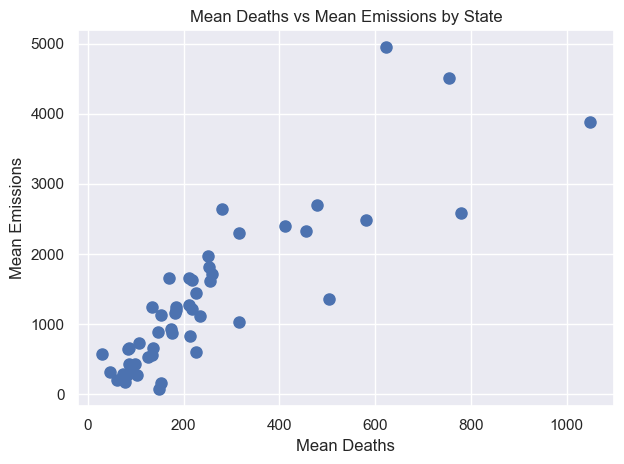

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'statistics_by_state' containing the statistics by state
# Replace 'statistics_by_state' with the actual name of your DataFrame

# Extract the maximum values of Deaths and Emissions for each state
x = statistics_by_state[('Deaths', 'mean')]
y = statistics_by_state[('Emissions_CO', 'mean')]  # or ('Emissions_PM10', 'max')

# Create a line plot
plt.plot(x, y, marker='o', linestyle='', markersize=8)
plt.xlabel('Mean Deaths')
plt.ylabel('Mean Emissions')
plt.title('Mean Deaths vs Mean Emissions by State')
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
statistics_by_urbanization = df_circulatory.groupby('2013 Urbanization').agg({
    'Deaths': ['mean', 'median', 'std', 'min', 'max'],
    'Emissions_CO': ['mean', 'median', 'std', 'min', 'max'],
    'Emissions_PM10': ['mean', 'median', 'std', 'min', 'max']
})

statistics_by_urbanization


Deaths                                 \
                               mean median          std min    max   
2013 Urbanization                                                    
Large Central Metro      542.064345  182.0  1221.245126  10  15627   
Large Fringe Metro       417.692623  148.0   692.295111  10   5631   
Medium Metro             321.178022  150.0   512.086482  10   4756   
Micropolitan (Nonmetro)  179.465266   96.0   224.082307  10   1959   
NonCore (Nonmetro)       162.024352   89.0   191.440685  10   1825   
Small Metro              164.720074   88.0   197.036053  10   1425   

                        Emissions_CO                                        \
                                mean       median          std         min   
2013 Urbanization                                                            
Large Central Metro      1906.108513  1542.839942  1467.004452   29.790738   
Large Fringe Metro       1786.263927  1467.181563  1357.253740   89.753394   
Medium Metro             1572.583063  1229.480126  1325.171157  112.861404   
Micropolitan (Nonmetro)  1504.777954  1184.581197  1305.171275  106.128192   
NonCore (Nonmetro)       1547.514730  1228.824776  1314.965325  106.128192   
Small Metro              1524.949562  1212.620015  1311.332018  106.128192   

                                     Emissions_PM10                          \
                                 max           mean      median         std   
2013 Urbanization                                                             
Large Central Metro      9618.345877     360.249437  254.091844  353.001243   
Large Fringe Metro       9618.345877     347.582206  259.519326  323.352923   
Medium Metro             9618.345877     328.273498  256.591270  301.520909   
Micropolitan (Nonmetro)  9618.345877     348.298393  272.605658  297.229970   
NonCore (Nonmetro)       9618.345877     364.675947  288.299221  296.718981   
Small Metro              9618.345877     343.274792  266.300721  295.622274   

                                                 
                               min          max  
2013 Urbanization                                
Large Central Metro       3.463379  2697.854607  
Large Fringe Metro        7.451850  2697.854607  
Medium Metro             16.706339  2697.854607  
Micropolitan (Nonmetro)  23.360809  2697.854607  
NonCore (Nonmetro)       25.023742  2697.854607  
Small Metro              16.706339  2697.854607

In [42]:
# don't use deaths or emissions without normalization

In [43]:
df_circulatory

,ICD Chapter,ICD Chapter Code,Year,Year Code,State,State Code,2013 Urbanization,2013 Urbanization Code,Gender,Age Group,Age Group Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,Emissions_CO,Emissions_PM10
110,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,40.0,35-44,24,55067,43.6,27.9,64.8,8.9,3011.541333,571.955762
111,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,50.0,45-54,48,46845,102.5,75.5,135.9,14.8,3011.541333,571.955762
112,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,60.0,55-64,92,30492,301.7,243.2,370.0,31.5,3011.541333,571.955762
113,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,70.0,65-74,209,27625,756.6,654.0,859.1,52.3,3011.541333,571.955762
114,Diseases of the circulatory system,I00-I99,1999,1999,Alabama,1,Large Central Metro,1,Female,80.0,75-84,460,20323,2263.4,2056.6,2470.3,105.5,3011.541333,571.955762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419317,Diseases of the circulatory system,I00-I99,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,50.0,45-54,15,10047,149.3,83.6,246.2,38.5,164.499445,426.780451
419318,Diseases of the circulatory system,I00-I99,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,60.0,55-64,43,12487,344.4,249.2,463.8,52.5,164.499445,426.780451
419319,Diseases of the circulatory system,I00-I99,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,70.0,65-74,59,9247,638.0,485.7,823.0,83.1,164.499445,426.780451
419320,Diseases of the circulatory system,I00-I99,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,80.0,75-84,64,4236,1510.9,1163.5,1929.3,188.9,164.499445,426.780451


In [44]:
aggregated_deaths = df_circulatory.groupby(["State", "Gender", "Age Group", "Year"]).agg(
    {
        'Deaths': ['mean', 'median', 'std', 'min', 'max'],
        "Population": ['mean', 'median', 'std', 'min', 'max'],
        'Emissions_CO': ['mean', 'median', 'std', 'min', 'max'],
        'Emissions_PM10': ['mean', 'median', 'std', 'min', 'max']
    })
aggregated_deaths.columns = [f'{col[0]}_{col[1]}' for col in aggregated_deaths.columns]

In [45]:
aggregated_deaths

Deaths_mean  Deaths_median  Deaths_std  \
State   Gender Age Group Year                                           
Alabama Female 30.0      1999    11.666667           10.0    2.886751   
                         2000    12.000000           12.0         NaN   
                         2001    11.000000           11.0         NaN   
                         2002    12.000000           12.0    2.828427   
                         2004    15.000000           15.0         NaN   
...                                    ...            ...         ...   
Wyoming Male   90.0      2012    68.000000           70.0   21.071308   
                         2013    64.333333           63.0    4.163332   
                         2014    58.000000           59.0   10.535654   
                         2015    59.000000           54.0    8.660254   
                         2016    71.666667           67.0   13.613719   

                               Deaths_min  Deaths_max  Population_mean  \
State   Gender Age Group Year                                            
Alabama Female 30.0      1999          10          15     65752.666667   
                         2000          12          12     80696.000000   
                         2001          11          11     78742.000000   
                         2002          10          14     74315.000000   
                         2004          15          15     78539.000000   
...                                   ...         ...              ...   
Wyoming Male   90.0      2012          46          88      1144.000000   
                         2013          61          69      1227.000000   
                         2014          47          68      1277.666667   
                         2015          54          69      1310.333333   
                         2016          61          87      1324.333333   

                               Population_median  Population_std  \
State   Gender Age Group Year                                      
Alabama Female 30.0      1999            73786.0    21083.885845   
                         2000            80696.0             NaN   
                         2001            78742.0             NaN   
                         2002            74315.0     5738.878636   
                         2004            78539.0             NaN   
...                                          ...             ...   
Wyoming Male   90.0      2012             1108.0       90.537285   
                         2013             1203.0       87.504286   
                         2014             1270.0       47.961790   
                         2015             1300.0       55.229823   
                         2016             1299.0       59.214300   

                               Population_min  Population_max  \
State   Gender Age Group Year                                   
Alabama Female 30.0      1999           41833           81639   
                         2000           80696           80696   
                         2001           78742           78742   
                         2002           70257           78373   
                         2004           78539           78539   
...                                       ...             ...   
Wyoming Male   90.0      2012            1077            1247   
                         2013            1154            1324   
                         2014            1234            1329   
                         2015            1261            1370   
                         2016            1282            1392   

                               Emissions_CO_mean  Emissions_CO_median  \
State   Gender Age Group Year                                           
Alabama Female 30.0      1999        3011.541333          3011.541333   
                         2000        2265.144310          2265.144310   
                         2001        2151.200553          2151.200553   
                      

In [46]:
aggregated_deaths.columns

Index(['Deaths_mean', 'Deaths_median', 'Deaths_std', 'Deaths_min',
       'Deaths_max', 'Population_mean', 'Population_median', 'Population_std',
       'Population_min', 'Population_max', 'Emissions_CO_mean',
       'Emissions_CO_median', 'Emissions_CO_std', 'Emissions_CO_min',
       'Emissions_CO_max', 'Emissions_PM10_mean', 'Emissions_PM10_median',
       'Emissions_PM10_std', 'Emissions_PM10_min', 'Emissions_PM10_max'],
      dtype='object')

In [47]:
aggregated_deaths["Deaths_per_10,000"] = (aggregated_deaths["Deaths_mean"] / aggregated_deaths["Population_mean"]) * 10000
aggregated_deaths["Emissions_CO_per_capita"] = aggregated_deaths["Emissions_CO_mean"] / aggregated_deaths["Population_mean"]
aggregated_deaths["Emissions_PM10_per_capita"] = aggregated_deaths["Emissions_PM10_mean"] / aggregated_deaths["Population_mean"]
aggregated_deaths = aggregated_deaths.reset_index()

In [48]:
# for any further visualization or eda use aggregated_deaths

In [49]:
# for modeling, according to me, other columns should not be used
cols_for_modeling = [
    "Year",
    "State",
    "Gender",
    "Age Group",
    "Deaths_per_10,000",
    "Emissions_CO_per_capita",
    "Emissions_PM10_per_capita"
]
df_for_modeling = aggregated_deaths[cols_for_modeling].copy()

df_for_modeling["Gender"] = df_for_modeling["Gender"].map({"Female": 0, "Male": 1})

state_dummies = pd.get_dummies(df_for_modeling["State"], drop_first=True)

df_for_modeling.drop(columns="State", inplace=True)
df_for_modeling[state_dummies.columns] = state_dummies
target = "Deaths_per_10,000"
X = df_for_modeling[[col for col in df_for_modeling.columns if col != target]]
y = df_for_modeling[target]


In [50]:
df_for_modeling.to_csv("circulatory_for_modeling.csv", index=False)

# For respiratory

In [51]:
df_respiratory = merged_df[merged_df['ICD Chapter'] == 'Diseases of the respiratory system'].copy()
df_respiratory.head(2)

,ICD Chapter,ICD Chapter Code,Year,Year Code,State,State Code,2013 Urbanization,2013 Urbanization Code,Gender,Age Group,Age Group Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,Emissions_CO,Emissions_PM10
149,Diseases of the respiratory system,J00-J98,1999,1999,Alabama,1,Large Central Metro,1,Female,55-64 years,55-64,19,30492,62.3 (Unreliable),37.5,97.3,14.3,3011.541333,571.955762
150,Diseases of the respiratory system,J00-J98,1999,1999,Alabama,1,Large Central Metro,1,Female,65-74 years,65-74,48,27625,173.8,128.1,230.4,25.1,3011.541333,571.955762


In [52]:
extract_numerical_value(df_respiratory, 'Crude Rate')

# Converting the data type of column "Crude Rate" from object to float64
df_respiratory["Crude Rate"] = df_respiratory['Crude Rate'].astype(float)

# Checking if it all worked out
print("Crude rate dtype", df_respiratory["Crude Rate"].dtype)

Crude rate dtype float64


In [53]:
characters_except_float(df_respiratory)

['ICD Chapter',
 'ICD Chapter Code',
 'State',
 '2013 Urbanization',
 'Gender',
 'Age Group',
 'Age Group Code']

In [54]:
remove_special_characters_and_alphabets(df_respiratory, ['Population', 
                                             'Crude Rate', 
                                             'Crude Rate Lower 95% Confidence Interval', 
                                             'Crude Rate Upper 95% Confidence Interval', 
                                             'Crude Rate Standard Error'])
df_respiratory.dropna()

,ICD Chapter,ICD Chapter Code,Year,Year Code,State,State Code,2013 Urbanization,2013 Urbanization Code,Gender,Age Group,Age Group Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,Emissions_CO,Emissions_PM10
149,Diseases of the respiratory system,J00-J98,1999,1999,Alabama,1,Large Central Metro,1,Female,55-64 years,55-64,19,30492,62.3,37.5,97.3,14.3,3011.541333,571.955762
150,Diseases of the respiratory system,J00-J98,1999,1999,Alabama,1,Large Central Metro,1,Female,65-74 years,65-74,48,27625,173.8,128.1,230.4,25.1,3011.541333,571.955762
151,Diseases of the respiratory system,J00-J98,1999,1999,Alabama,1,Large Central Metro,1,Female,75-84 years,75-84,124,20323,610.1,502.8,717.5,54.8,3011.541333,571.955762
152,Diseases of the respiratory system,J00-J98,1999,1999,Alabama,1,Large Central Metro,1,Female,85+ years,85+,158,8514,1855.8,1566.4,2145.1,147.6,3011.541333,571.955762
153,Diseases of the respiratory system,J00-J98,1999,1999,Alabama,1,Large Fringe Metro,2,Female,55-64 years,55-64,15,18828,79.7,44.6,131.4,20.6,3011.541333,571.955762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419328,Diseases of the respiratory system,J00-J98,2016,2016,Wyoming,56,Micropolitan (Nonmetro),5,Male,75-84 years,75-84,29,3771,769.0,515,1104.5,142.8,164.499445,426.780451
419329,Diseases of the respiratory system,J00-J98,2016,2016,Wyoming,56,Micropolitan (Nonmetro),5,Male,85+ years,85+,27,1282,2106.1,1387.9,3064.2,405.3,164.499445,426.780451
419330,Diseases of the respiratory system,J00-J98,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,65-74 years,65-74,23,9247,248.7,157.7,373.2,51.9,164.499445,426.780451
419331,Diseases of the respiratory system,J00-J98,2016,2016,Wyoming,56,NonCore (Nonmetro),6,Male,75-84 years,75-84,32,4236,755.4,516.7,1066.4,133.5,164.499445,426.780451


In [55]:
columns_list = ['Crude Rate', 'Population', 'Crude Rate Lower 95% Confidence Interval', 'Crude Rate Upper 95% Confidence Interval', 'Crude Rate Standard Error']
print(find_Number_of_rows_with_nothing(df_respiratory, columns_list))

remove_empty_with_null(df_respiratory, columns_list)
df_respiratory["Crude Rate Lower 95% Confidence Interval"] = df_respiratory['Crude Rate Lower 95% Confidence Interval'].astype(float)
df_respiratory["Crude Rate Upper 95% Confidence Interval"] = df_respiratory['Crude Rate Upper 95% Confidence Interval'].astype(float)
df_respiratory["Crude Rate Standard Error"] = df_respiratory['Crude Rate Standard Error'].astype(float)
df_respiratory["Crude Rate"] = df_respiratory['Crude Rate'].astype(float)
print_null_percentage(df_respiratory)

df_respiratory = df_respiratory.dropna(subset=['Population', 
                       'Crude Rate', 
                       'Crude Rate Lower 95% Confidence Interval', 
                       'Crude Rate Upper 95% Confidence Interval', 
                       'Crude Rate Standard Error']).copy()

df_respiratory['Population'] = df_respiratory['Population'].astype('int64')
df_respiratory['Age Group'] = df_respiratory['Age Group'].map(age_mapping)
df_respiratory.dropna(inplace = True)

{'Crude Rate': 0, 'Population': 0, 'Crude Rate Lower 95% Confidence Interval': 0, 'Crude Rate Upper 95% Confidence Interval': 0, 'Crude Rate Standard Error': 0}
Percentage of null values in ICD Chapter: 0.0%
Percentage of null values in ICD Chapter Code: 0.0%
Percentage of null values in Year: 0.0%
Percentage of null values in Year Code: 0.0%
Percentage of null values in State: 0.0%
Percentage of null values in State Code: 0.0%
Percentage of null values in 2013 Urbanization: 0.0%
Percentage of null values in 2013 Urbanization Code: 0.0%
Percentage of null values in Gender: 0.0%
Percentage of null values in Age Group: 0.0%
Percentage of null values in Age Group Code: 0.0%
Percentage of null values in Deaths: 0.0%
Percentage of null values in Population: 0.0%
Percentage of null values in Crude Rate: 0.0%
Percentage of null values in Crude Rate Lower 95% Confidence Interval: 0.0%
Percentage of null values in Crude Rate Upper 95% Confidence Interval: 0.0%
Percentage of null values in Crude

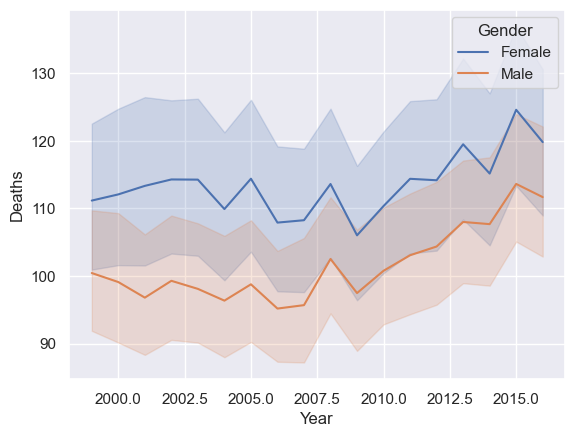

In [56]:
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="Year", y="Deaths",
             hue="Gender",
             data=df_respiratory)
plt.show()

In [57]:
aggregated_deaths_resp = df_respiratory.groupby(["State", "Gender", "Age Group", "Year"]).agg(
    {
        'Deaths': ['mean', 'median', 'std', 'min', 'max'],
        "Population": ['mean', 'median', 'std', 'min', 'max'],
        'Emissions_CO': ['mean', 'median', 'std', 'min', 'max'],
        'Emissions_PM10': ['mean', 'median', 'std', 'min', 'max']
    })
aggregated_deaths_resp.columns = [f'{col[0]}_{col[1]}' for col in aggregated_deaths_resp.columns]

aggregated_deaths_resp["Deaths_per_10,000"] = (aggregated_deaths_resp["Deaths_mean"] / aggregated_deaths_resp["Population_mean"]) * 10000
aggregated_deaths_resp["Emissions_CO_per_capita"] = aggregated_deaths_resp["Emissions_CO_mean"] / aggregated_deaths_resp["Population_mean"]
aggregated_deaths_resp["Emissions_PM10_per_capita"] = aggregated_deaths_resp["Emissions_PM10_mean"] / aggregated_deaths_resp["Population_mean"]
aggregated_deaths_resp = aggregated_deaths_resp.reset_index()

In [58]:
# for any further visualization or eda use aggregated_deaths_resp

In [59]:
# for modeling, according to me, other columns should not be used

df_for_modeling_resp = aggregated_deaths_resp[cols_for_modeling].copy()

df_for_modeling_resp["Gender"] = df_for_modeling_resp["Gender"].map({"Female": 0, "Male": 1})

state_dummies = pd.get_dummies(df_for_modeling_resp["State"], drop_first=True)

df_for_modeling_resp.drop(columns="State", inplace=True)
df_for_modeling_resp[state_dummies.columns] = state_dummies
target = "Deaths_per_10,000"
X = df_for_modeling_resp[[col for col in df_for_modeling_resp.columns if col != target]]
y = df_for_modeling_resp[target]
# use year to split train test, and then make sure to drop year column

In [60]:
df_for_modeling_resp.to_csv("respiratory_for_modeling.csv", index=False)

In [61]:
df_for_modeling

,Year,Gender,Age Group,"Deaths_per_10,000",Emissions_CO_per_capita,Emissions_PM10_per_capita,Alaska,Arizona,Arkansas,California,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1999,0,30.0,1.774326,0.045801,0.008699,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,0,30.0,1.487063,0.028070,0.006225,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,0,30.0,1.396967,0.027320,0.005956,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2002,0,30.0,1.614748,0.032975,0.003371,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2004,0,30.0,1.909879,0.026834,0.003298,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12031,2012,1,90.0,594.405594,0.201541,0.396621,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12032,2013,1,90.0,524.314045,0.185597,0.321820,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12033,2014,1,90.0,453.952518,0.164659,0.306184,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12034,2015,1,90.0,450.267108,0.155445,0.314116,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
df_for_modeling_resp

,Year,Gender,Age Group,"Deaths_per_10,000",Emissions_CO_per_capita,Emissions_PM10_per_capita,Alaska,Arizona,Arkansas,California,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2002,0,40.0,1.298701,0.026521,0.002712,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011,0,40.0,1.919017,0.014635,0.003475,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2013,0,40.0,1.269036,0.014223,0.003152,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,0,40.0,1.645320,0.013837,0.003256,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1999,0,50.0,2.446277,0.049114,0.009328,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,2012,1,90.0,180.652681,0.201541,0.396621,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9645,2013,1,90.0,285.248574,0.185597,0.321820,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9646,2014,1,90.0,229.585181,0.164659,0.306184,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9647,2015,1,90.0,193.335029,0.155445,0.314116,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
